# Estimate SEIR parameters from data for different countries

In [1]:
%run ./Load-Data.ipynb

                  fips   cases  deaths
date                                  
2020-01-21     53061.0       1       0
2020-01-22     53061.0       1       0
2020-01-23     53061.0       1       0
2020-01-24     70092.0       2       0
2020-01-25     76151.0       3       0
...                ...     ...     ...
2020-03-26  48514017.0   85615    1279
2020-03-27  52188877.0  102913    1652
2020-03-28  55596535.0  123831    2139
2020-03-29  58400988.0  142178    2413
2020-03-30  61218258.0  163676    2909

[70 rows x 3 columns]


In [2]:
from matplotlib import pyplot
%matplotlib inline

pyplot.style.use("fivethirtyeight")# for pretty graphs

# Increase the default plot size and set the color scheme
pyplot.rcParams['figure.figsize'] = 8, 15

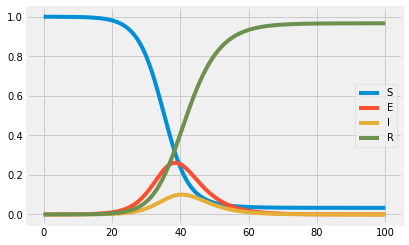

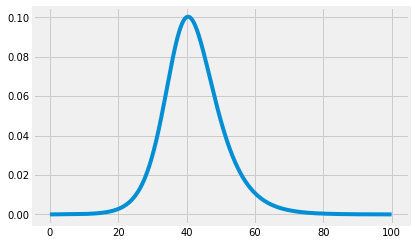

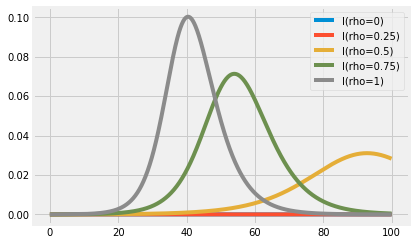

In [3]:
%run ./SEIR-with-Social-Distancing.ipynb
def predictValues(alpha, beta, gamma, nSteps, N):
    init_vals = 1 - 1/N, 1/N, 0, 0
    params = alpha, beta, gamma
    dt = .1
    t = np.linspace(0, nSteps, int(nSteps/dt) + 1)
    results = base_seir_model(init_vals, params, t)
    return results

In [4]:
def computeGamma(infected, removed):    
    dR_dt= np.diff(removed)
    infected[infected == 0] = 0.0001 # to prevent divide by zero
    gamma = dR_dt / infected[1:]
    pyplot.plot(gamma, label='gamma')
    pyplot.title('computeGamma')
    pyplot.xticks(rotation=90)
    pyplot.legend()
    pyplot.show()  
    return gamma.mean()

In [5]:
def computeLoss(yhat, infected, removed):
    offsetOfyHat = 0
    offsetOfinfected = 0
    if(len(infected)>len(yhat[2, :])):
        offsetOfinfected = len(infected)-len(yhat[2, :])
    else:
        offsetOfyHat = len(yhat[2, :])-len(infected)
    loss= infected[offsetOfinfected:] - yhat[2,offsetOfyHat:]
    l1 = (loss*loss).sum()
    
    loss= (removed[offsetOfinfected:] - yhat[3,offsetOfyHat:])
    l2 = (loss*loss).sum()
    
    weightForRecovered = 0.1
    return weightForRecovered * l1 + (1 - weightForRecovered) * l2

In [6]:
import numpy as np
def estimateParameters(infected, removed, N):
    minLoss = -1
    minParams=[]
    lossHistory=[]
    alphaHistory=[]
    betaHistory=[]
    gammaHistory=[]
    minYhat = None
   
    alphaSpace = np.arange(0.4,1,0.05)
    betaSpace = np.arange(0.4,1,0.05)
    gammaSpace = np.arange(0,1,0.05)
    for index in range(len(infected)):
        if(infected[index]!=0):
            break
    infected = infected[index : ]
    removed = removed[index : ]
    nSteps = len(infected)/10
    gamma = computeGamma(infected, removed)
    for alpha in alphaSpace:
        for beta in betaSpace:
#             for gamma in gammaSpace:
            
            yhat = (predictValues(alpha, beta, gamma, nSteps, N)*N)
            loss = computeLoss(yhat, infected, removed)
            if(loss < minLoss) or (minLoss == -1):
                minLoss = loss
                minParams = [alpha, beta, gamma]
                minYhat = yhat
            lossHistory.append(loss)
            alphaHistory.append(alpha)
            betaHistory.append(beta)
            gammaHistory.append(gamma)
    pyplot.plot(alphaHistory, label='alpha')
    pyplot.plot(betaHistory, label='beta')
    pyplot.plot(gammaHistory, label='gamma')
    pyplot.title('paramsHistory')
    pyplot.legend()
    pyplot.show()            
    pyplot.plot(lossHistory)
    pyplot.title('lossHistory')
    pyplot.legend()
    pyplot.show()
    pyplot.plot(minYhat[2,1:])
    pyplot.title('minYhat[2,1:]')
    pyplot.legend()
    pyplot.show()
    pyplot.plot(infected)
    pyplot.title('infected')
    pyplot.legend()
    pyplot.show()
    pyplot.plot(minYhat[3,1:])
    pyplot.title('minYhat[3,1:]')
    pyplot.legend()
    pyplot.show()
    pyplot.plot(removed)
    pyplot.title('removed')
    pyplot.legend()
    pyplot.show()
#     Find index of minimum loss and return params for param history from that index
    return minParams

In [7]:
#params = estimateParameters(total_positive_cases_timeseries, total_removed_cases_timeseries, N)
#print(params)

India


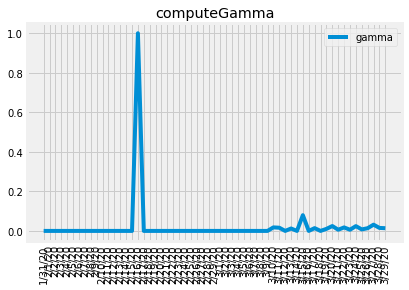

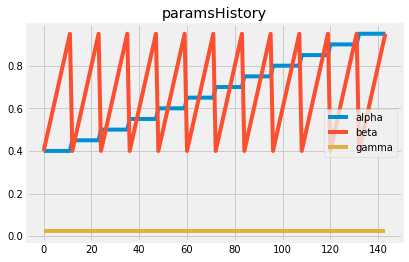

No handles with labels found to put in legend.


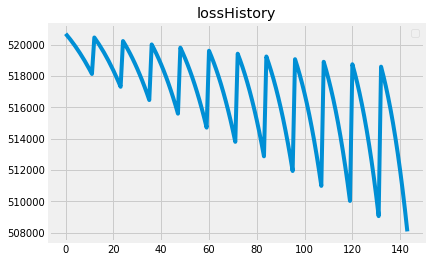

No handles with labels found to put in legend.


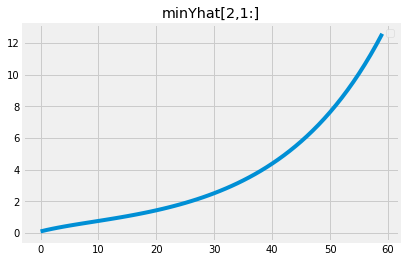

No handles with labels found to put in legend.


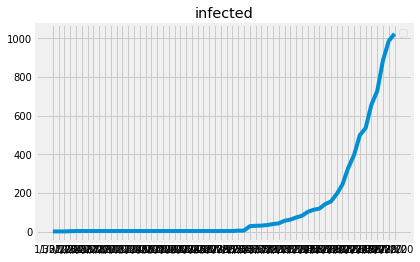

No handles with labels found to put in legend.


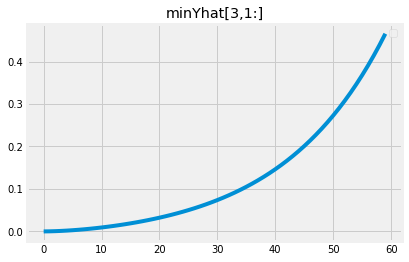

No handles with labels found to put in legend.


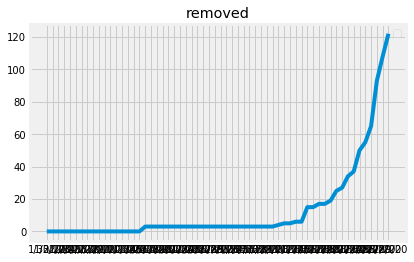

Pakistan


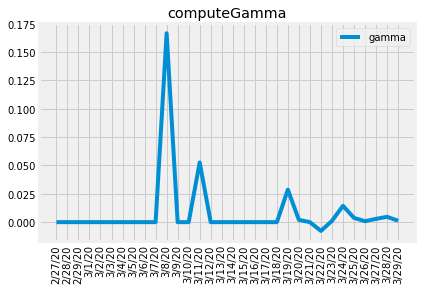

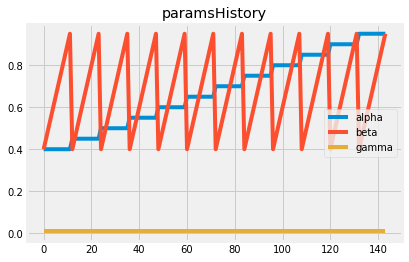

No handles with labels found to put in legend.


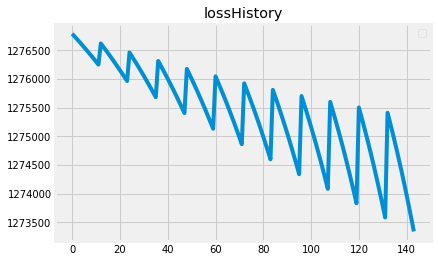

No handles with labels found to put in legend.


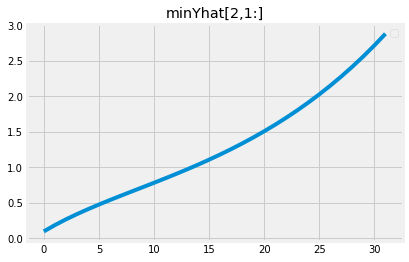

No handles with labels found to put in legend.


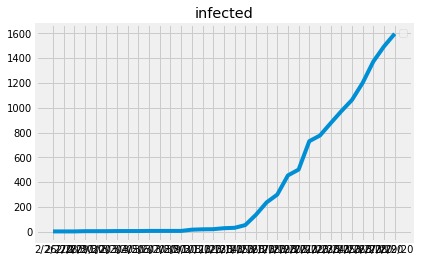

No handles with labels found to put in legend.


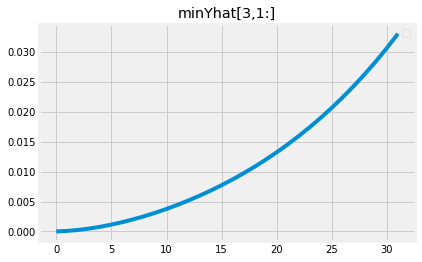

No handles with labels found to put in legend.


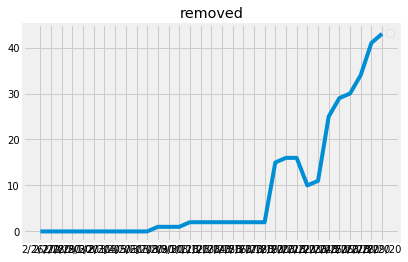

Italy


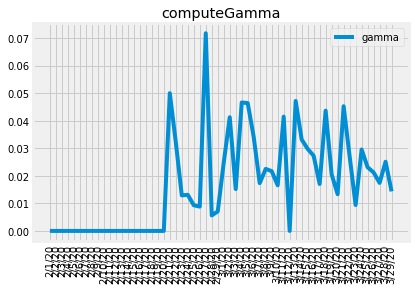

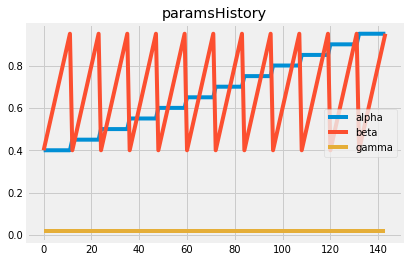

No handles with labels found to put in legend.


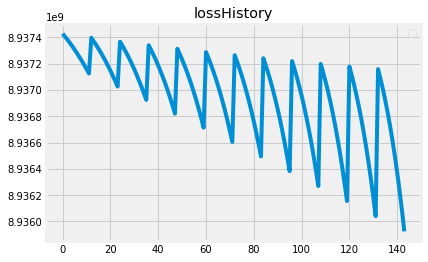

No handles with labels found to put in legend.


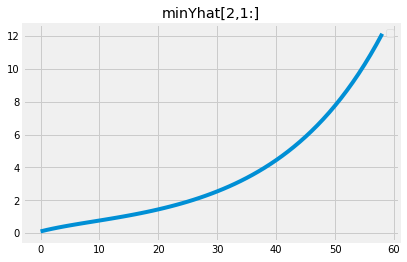

No handles with labels found to put in legend.


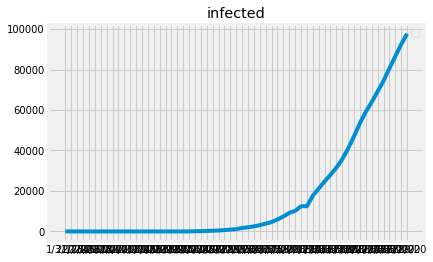

No handles with labels found to put in legend.


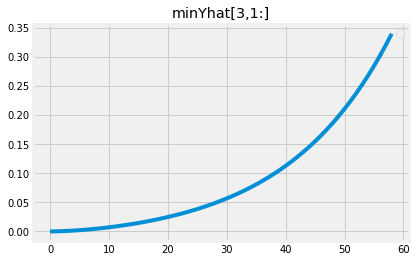

No handles with labels found to put in legend.


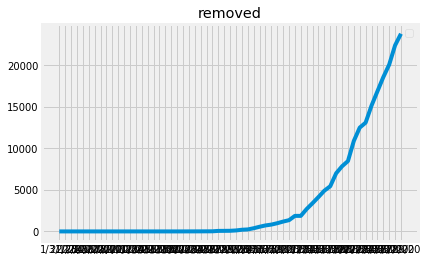

Spain


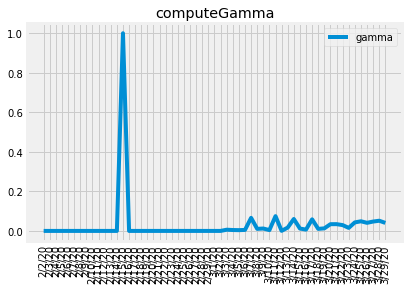

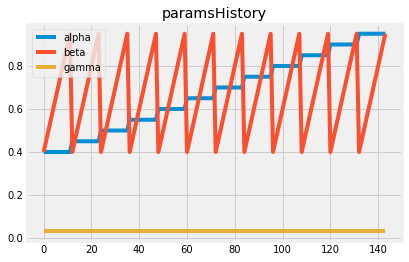

No handles with labels found to put in legend.


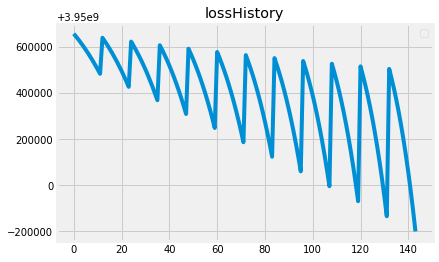

No handles with labels found to put in legend.


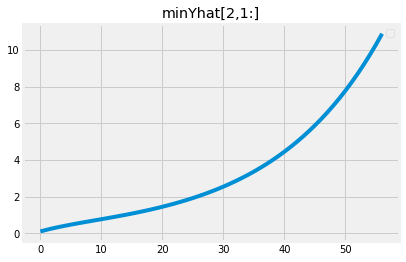

No handles with labels found to put in legend.


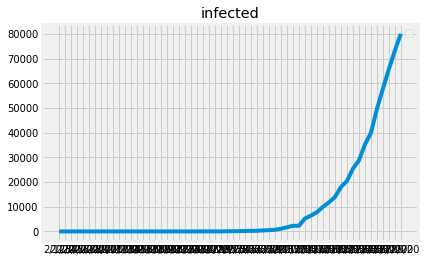

No handles with labels found to put in legend.


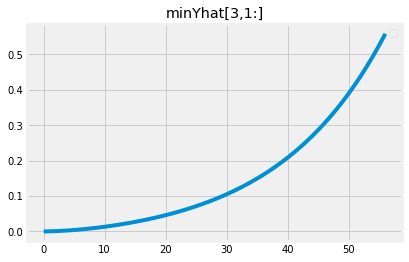

No handles with labels found to put in legend.


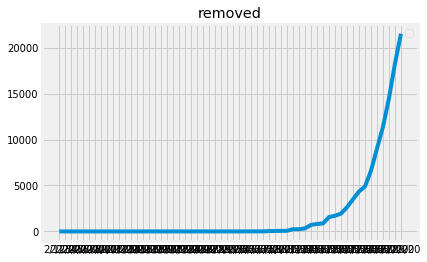

France


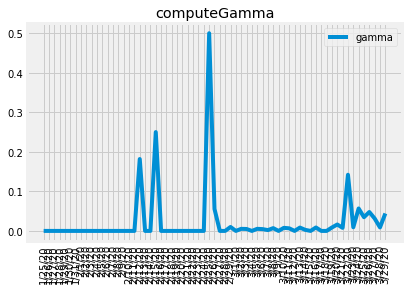

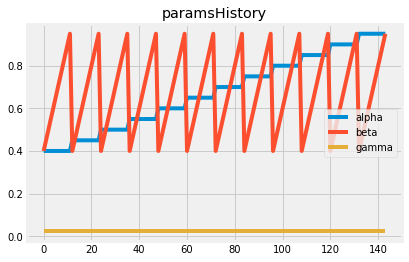

No handles with labels found to put in legend.


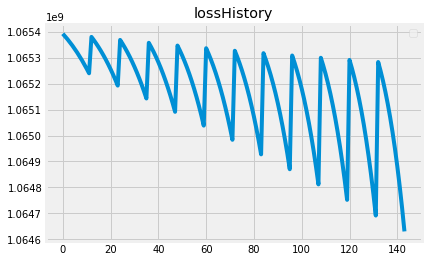

No handles with labels found to put in legend.


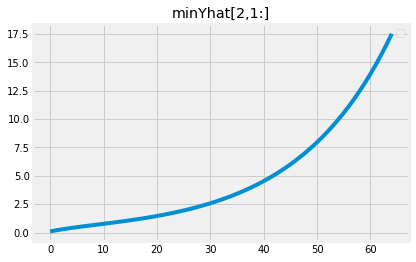

No handles with labels found to put in legend.


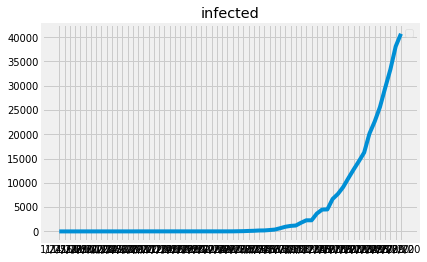

No handles with labels found to put in legend.


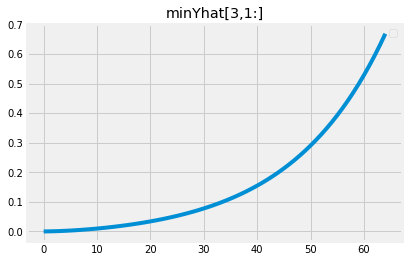

No handles with labels found to put in legend.


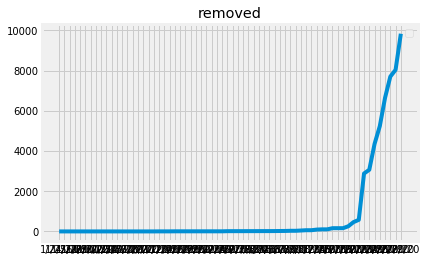

Iran


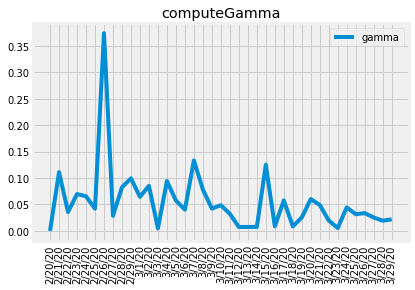

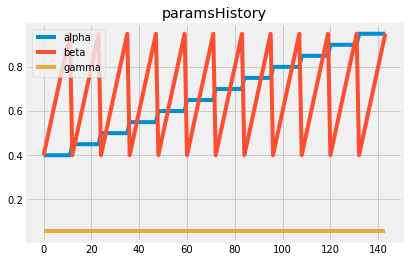

No handles with labels found to put in legend.


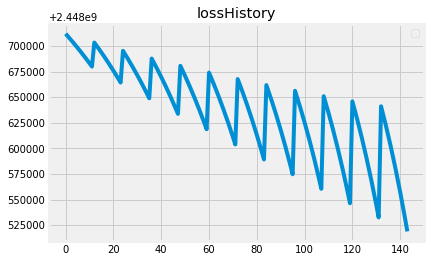

No handles with labels found to put in legend.


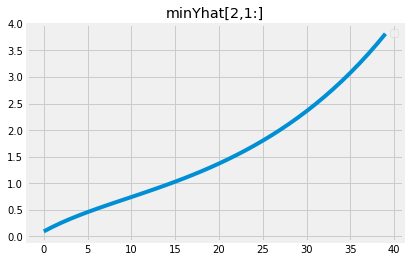

No handles with labels found to put in legend.


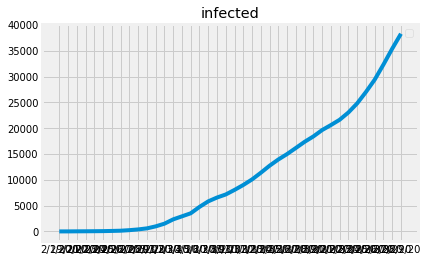

No handles with labels found to put in legend.


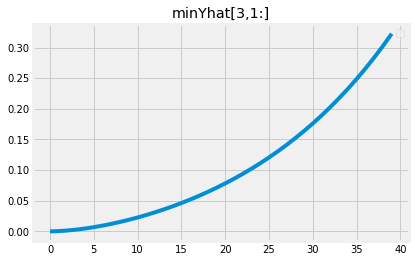

No handles with labels found to put in legend.


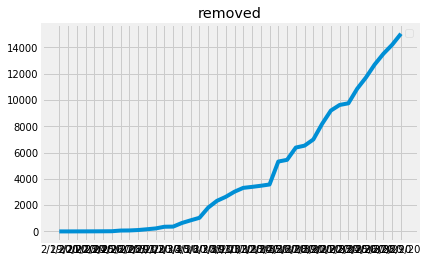

China


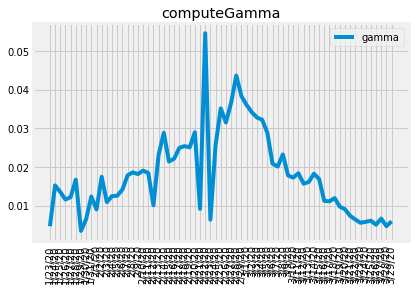

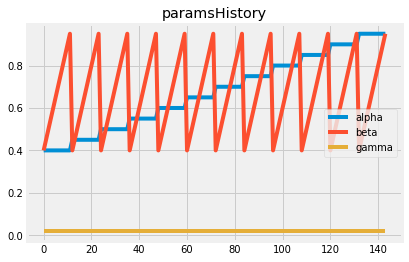

No handles with labels found to put in legend.


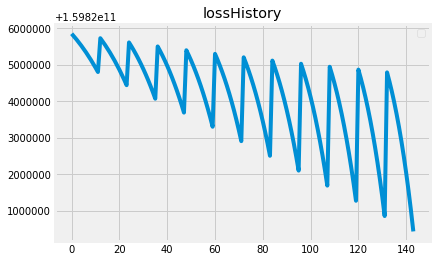

No handles with labels found to put in legend.


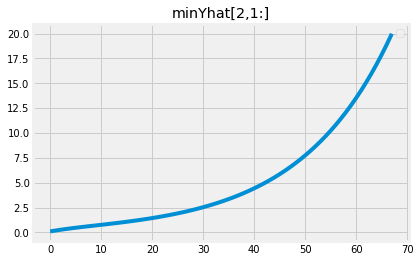

No handles with labels found to put in legend.


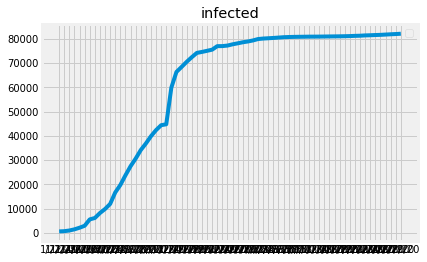

No handles with labels found to put in legend.


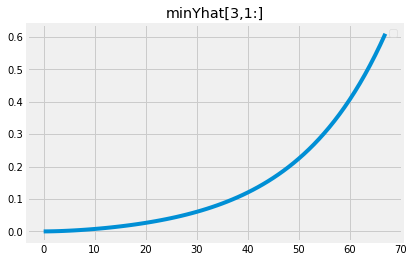

No handles with labels found to put in legend.


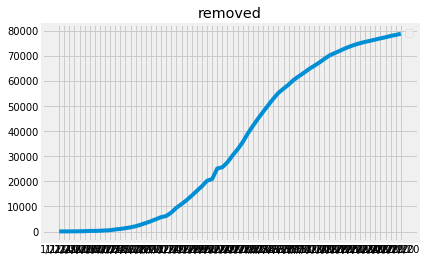

Germany


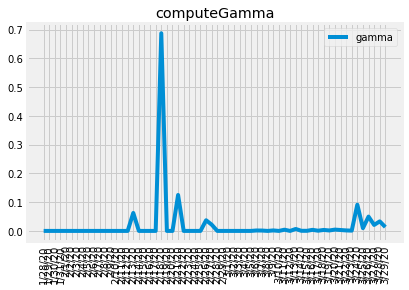

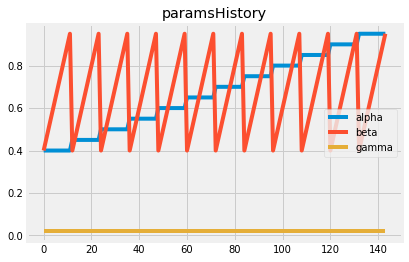

No handles with labels found to put in legend.


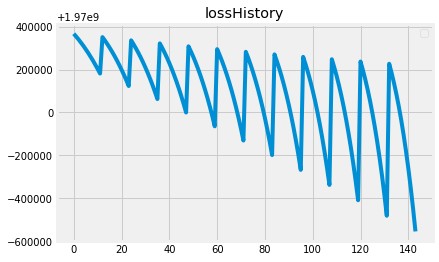

No handles with labels found to put in legend.


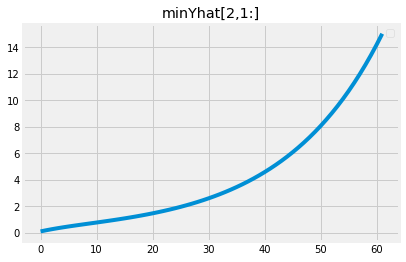

No handles with labels found to put in legend.


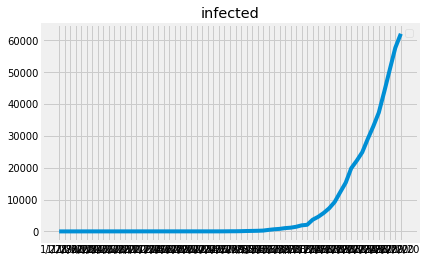

No handles with labels found to put in legend.


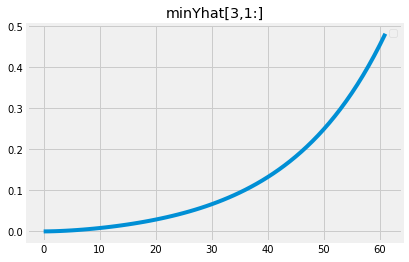

No handles with labels found to put in legend.


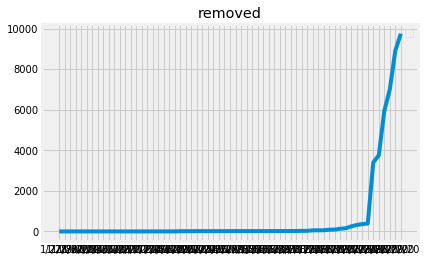

United Kingdom


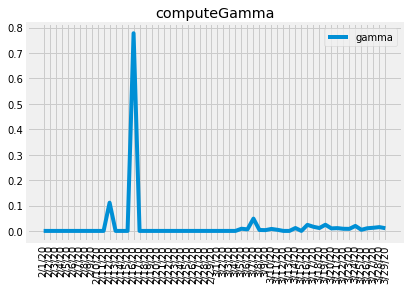

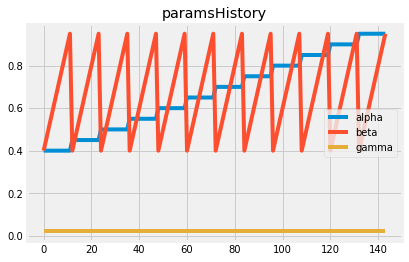

No handles with labels found to put in legend.


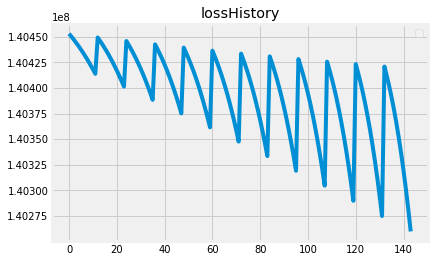

No handles with labels found to put in legend.


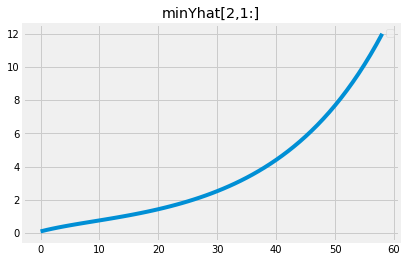

No handles with labels found to put in legend.


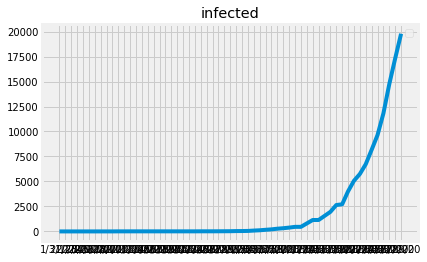

No handles with labels found to put in legend.


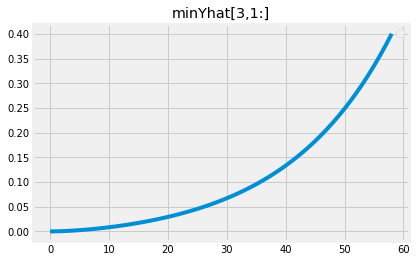

No handles with labels found to put in legend.


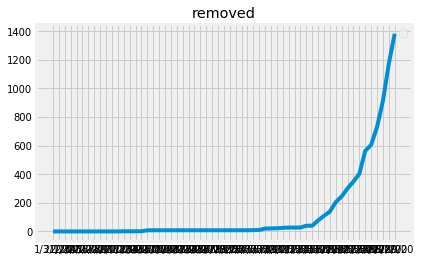

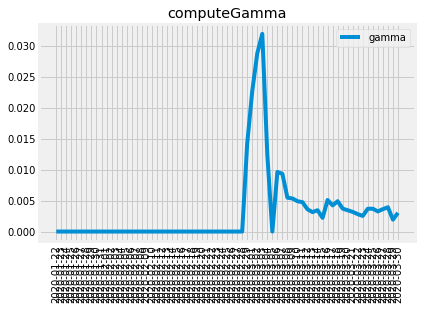

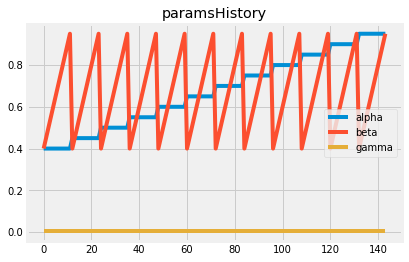

No handles with labels found to put in legend.


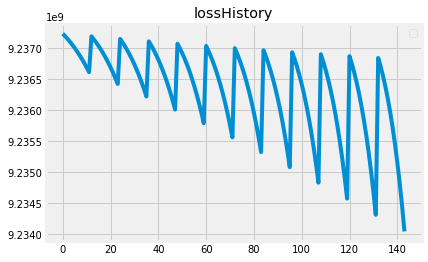

No handles with labels found to put in legend.


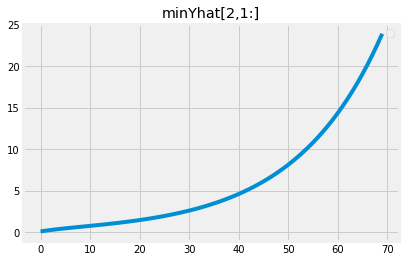

No handles with labels found to put in legend.


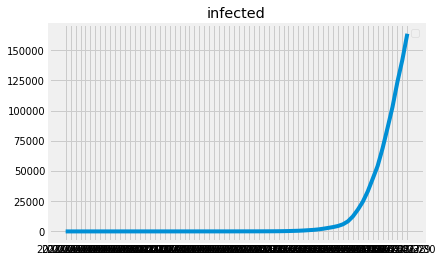

No handles with labels found to put in legend.


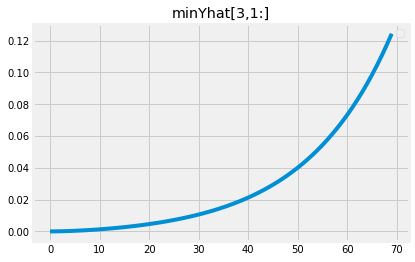

No handles with labels found to put in legend.


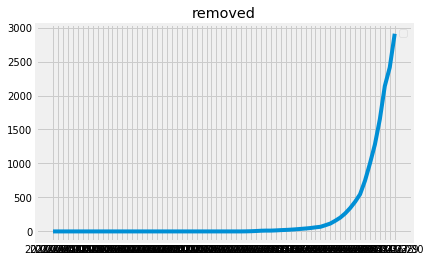

          Country                                             Params
0           India  [0.9499999999999998, 0.9499999999999998, 0.022...
1        Pakistan  [0.9499999999999998, 0.9499999999999998, 0.008...
2           Italy  [0.9499999999999998, 0.9499999999999998, 0.016...
3           Spain  [0.9499999999999998, 0.9499999999999998, 0.030...
4          France  [0.9499999999999998, 0.9499999999999998, 0.022...
5            Iran  [0.9499999999999998, 0.9499999999999998, 0.055...
6           China  [0.9499999999999998, 0.9499999999999998, 0.018...
7         Germany  [0.9499999999999998, 0.9499999999999998, 0.019...
8  United Kingdom  [0.9499999999999998, 0.9499999999999998, 0.020...
9              US  [0.9499999999999998, 0.9499999999999998, 0.003...


In [8]:
countries = list(["India", "Pakistan", "Italy", "Spain", "France", "Iran", "China", "Germany", "United Kingdom"])
# countries = list([countryToAnalyze, "Pakistan"])

from pandas import *
pyplot.figure(1)
paramsResultDf = DataFrame({'Country': [], 'Params': []})

#This is incomplete - WIP
for country in countries:
    print(country)
    N = int(populationDf [populationDf['Country']==country]['Population'])
#     print('Population of ', country, 'is :: ', N )
    confirmedTSDf = confirmedDf.loc[confirmedDf["Country/Region"] == country].sum().T[4:]
    recoveredTSDf = recoveredDf.loc[recoveredDf["Country/Region"] == country].sum().T[4:]
    deathsTSDf = deathsDf.loc[deathsDf["Country/Region"] == country].sum().T[4:]
#     removedArr = recoveredTSDf.values + deathsTSDf.values
    params = estimateParameters(confirmedTSDf, (recoveredTSDf+deathsTSDf), N)
    paramsResultDf = paramsResultDf.append({'Country': country , 'Params': params}, ignore_index=True)
N = int(populationDf [populationDf['Country']=='United States']['Population'])
params_us = estimateParameters(total_infected_us_timeseries, total_removed_us_timeseries, N)  
paramsResultDf = paramsResultDf.append({'Country': "US" , 'Params': params_us}, ignore_index=True)
print(paramsResultDf)
    